# Linear Algebra I

Linear algebra is a core topic in modern applied mathematics. Essentially every important method in statistics, data science, and machine learning is built on linear algebra. Indeed, deep neural networks, which we will discuss shortly, are built on a foundation of matrix multiplication coupled with simple nonlinear functions. 

<figure class="image" style="width:30%">
  <img src="https://imgs.xkcd.com/comics/machine_learning_2x.png" alt="">
  <figcaption><i></i></figcaption>
</figure>

In this lecture, we'll see how to perform several important operations in linear algebra using our good friend, Numpy. These operations include: 

- Matrix multiplication. 
- Exact and approximate solutions to linear systems. 
- Singular value and eigenvalue-eigenvector decompositions. 

Along the way, we'll show several examples from statistics and applied mathematics, including simulation of partial differential equations; least-squares regression; and image compression. 

This is probably the lecture in which things will get "the most mathematical." Comfort with concepts from Math 33A or equivalent will be helpful. If you're not familiar with these concepts, that's ok -- feel free to ask questions. We'll all get through this just fine. 

In [1]:
# no fancy packages this time! just our good friends numpy and matplotlib
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(1234)

## Basic Matrix Operations

A *matrix* is a two-dimensional array of numbers. 

In [2]:
# random matrix data to play with
n = 5
A = np.random.randint(1, 10, size = (n, n))
A

array([[4, 7, 6, 5, 9],
       [2, 8, 7, 9, 1],
       [6, 1, 7, 3, 1],
       [6, 3, 7, 4, 8],
       [1, 1, 4, 3, 4]])

Matrices admit several standard operations, including: 

In [3]:
# scalar multiplication
2*A

array([[ 8, 14, 12, 10, 18],
       [ 4, 16, 14, 18,  2],
       [12,  2, 14,  6,  2],
       [12,  6, 14,  8, 16],
       [ 2,  2,  8,  6,  8]])

In [4]:
# transposition
A.T

array([[4, 2, 6, 6, 1],
       [7, 8, 1, 3, 1],
       [6, 7, 7, 7, 4],
       [5, 9, 3, 4, 3],
       [9, 1, 1, 8, 4]])

In [5]:
# application of transposition: a "symmetrized" version of A
# symmetric matrices satisfy A = A.T
(A + A.T)/2

array([[4. , 4.5, 6. , 5.5, 5. ],
       [4.5, 8. , 4. , 6. , 1. ],
       [6. , 4. , 7. , 5. , 2.5],
       [5.5, 6. , 5. , 4. , 5.5],
       [5. , 1. , 2.5, 5.5, 4. ]])

Inversion is an especially important matrix operation. The inverse $\mathbf{A}^{-1}$ of a square matrix $\mathbf{A}$ satisfies $\mathbf{A}\mathbf{A}^{-1} = \mathbf{I}$, where $\mathbf{I}$ is the identity matrix. We'll see how to multiply matrices and check this in a sec. 

In [6]:
# inverse of A
A_inv = np.linalg.inv(A) 
A_inv

array([[-0.30292479,  0.12743733, -0.1810585 ,  0.58704735, -0.47910864],
       [ 0.38857939, -0.07381616,  0.19777159, -0.42200557, -0.06128134],
       [ 0.48746518, -0.23955432,  0.5097493 , -0.84122563,  0.51810585],
       [-0.65529248,  0.33774373, -0.51810585,  0.88370474, -0.24791086],
       [-0.01740947, -0.02715877, -0.12534819,  0.13718663,  0.05292479]])

## Matrix multiplication

In [7]:
# random vector
b = np.random.randint(1, 5, size = n)

In [8]:
# matrix-vector product
A.dot(b)

# modern, convenient syntax -- same effect
A@b

array([98, 86, 52, 88, 47])

In [9]:
A.dot(b) == A@b

array([ True,  True,  True,  True,  True])

In [10]:
# random matrix
B = np.random.randint(1, 10, size = (n, n))

# matrix-matrix product (same as A.dot(B))
A@B

array([[172,  91, 202, 149, 203],
       [166,  89, 169, 108, 148],
       [ 85,  56, 135,  90, 120],
       [146,  86, 193, 145, 191],
       [ 78,  42,  86,  74,  83]])

In [11]:
# checking our inverse from earlier
# observe--finite precision arithmetic! 
A @ A_inv

array([[ 1.00000000e+00,  2.77555756e-17,  8.32667268e-17,
        -1.38777878e-16, -8.32667268e-17],
       [-1.49186219e-16,  1.00000000e+00, -2.49800181e-16,
         8.32667268e-17,  5.55111512e-17],
       [ 7.28583860e-17, -8.32667268e-17,  1.00000000e+00,
         8.32667268e-17,  0.00000000e+00],
       [ 1.38777878e-16, -2.22044605e-16, -2.22044605e-16,
         1.00000000e+00,  2.22044605e-16],
       [-4.16333634e-17, -1.11022302e-16,  0.00000000e+00,
         7.77156117e-16,  1.00000000e+00]])

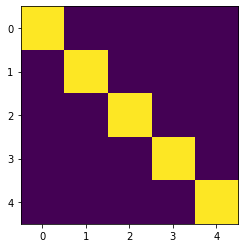

In [12]:
plt.imshow(A@A_inv) # looks like the identity matrix

In [13]:
# identity matrix
I_n = np.eye(n)

# check the result to within machine precision, entrywise
np.isclose(I_n, A@A_inv)

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [14]:
# aggregates the above
np.allclose(I_n, A@A_inv)

True

## Application: Simulating Heat Diffusion

Matrix multiplication provides a simple way to simulate 1-dimensional partial differential equations in discrete time. For example, the 1-d heat equation reads

$$\frac{\partial f(x, t)}{\partial t} = \frac{\partial^2 f}{\partial x^2 }\;.$$

In a discrete approximation, we can write this as 

$$f(x_i, t + 1) - f(x_i, t) \approx \epsilon\left[f(x_{i+1}, t) - 2f(x_i, t) + f(x_{i-1}, t)\right]\;,$$

where $\epsilon$ is a small positive number that controls the timescale of the approximation. 

We can write the righthand side of this equation as a matrix-vector product:

- Let $\mathbf{v}(t)$ be the values of $f(\mathbf{x}, t)$ -- that is, $v_i = f(x_i)$. 
- Let $\mathbf{A}$ be the *transition operator*: 

$$
\mathbf{A} = \left[\begin{matrix}
    -2 &  1 & 0 & \cdots& 0& 0 & 0\\
     1 & -2 & 1 & \cdots & 0& 0 &  0\\
     0 & 1 & -2 & \cdots & 0& 0 &  0\\
     \vdots & \vdots &\vdots & \ddots &  \vdots & \vdots & \vdots \\ 
     0  & 0  & 0  & \cdots   & -2     & 1 & 0\\
     0  & 0  & 0  & \cdots   & 1     & -2 & 1\\
     0 & 0  & 0  & \cdots & 0     & 1     & -2 \\
\end{matrix}\right]
$$

This transition operator has the property that $[\mathbf{A}\mathbf{v}]_i$ is equal to the righthand side of the discrete approximation, for $i = 2,\ldots,n-1$. That is, we can write 

$$
\mathbf{v}(t+1) = \mathbf{v}(t) + \epsilon \mathbf{A}\mathbf{v}(t) = (\mathbf{I} + \epsilon\mathbf{A})\mathbf{v}(t)
$$

Note that there are issues at the boundary (i.e. where $i = 1$ or $i = n$), and further modeling decisions must be made in order to handle these. In the transition operator above, we are effectively allowing heat to escape at the boundaries. 

To simulate heat diffusion in Python, we can just build this transition operator as a matrix (`numpy` array) and then iterate this update. 

In [15]:
# size of simulation
n = 201

# Construct A using the handy np.diag() function
A = -2*np.eye(n)
A += np.diag(np.ones(n-1), 1)
A += np.diag(np.ones(n-1), -1)

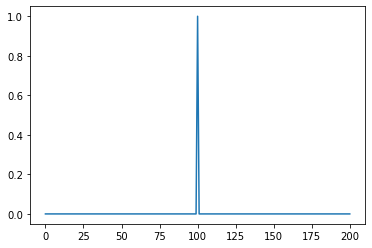

In [16]:
# construct initial condition: 1 unit of heat at midpoint. 
v0 = np.zeros(n)
v0[int(n/2)] = 1.0
plt.plot(v0)

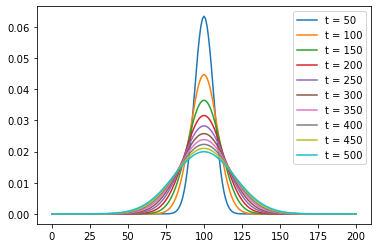

In [17]:
# simulate diffusion and plot, time intervals of 50

epsilon = 0.4
v = v0
for t in range(1, 501):
    if t % 50 == 0:
        plt.plot(np.arange(n), v, label = f"t = {t}")
    v = v + epsilon * (A @ v)
plt.legend()

We observe the bell-shaped curve (Gaussian distribution) characteristic of 1d diffusion, just as we'd expect. Note that once we constructed the discretized approximation, we were able to perform the simulation in Python purely via linear algebra! 

## Solving Linear Equations

One of the most fundamental tasks in applied mathematics is solving linear systems of the form 

$$\mathbf{A}\mathbf{x} = \mathbf{b}\;,$$

where $\mathbf{A} \in \mathbb{R}^{n \times m}$, $\mathbf{x} \in \mathbb{R}^{m}$, and $\mathbf{b} \in \mathbb{R}^{n}$. This equation represents a set of linear relationships between variables, a single one of which looks like this: 

$$
a_{i1}x_1 + a_{i2}x_2 + \cdots + a_{im}x_m = b_i\;.
$$

Collectively, the equations in a linear system define a "flat space" called an *affine subspace* of $\mathbb{R}^m$.  

> 1. When $\mathbf{A}$ is square and of full rank (determinant nonzero), this equation has a unique solution. 
> 2. When $\mathbf{A}$ is not square or not of full rank, then this equation may have either 0 or infinitely many solutions. 

In Case 1 ("the good case"), we can use a simple built-in `numpy` method: `np.linalg.solve`. 

In [18]:
# solve A@x = b for x

n = 5

A = np.random.randint(1, 5, size = (n, n))
b = np.random.randint(1, 5, size = n)

x = np.linalg.solve(A, b)
x

array([ 0.73684211,  0.21052632, -1.61403509,  1.77192982, -0.66666667])

In [19]:
np.allclose(A @ x, b)

True

In [20]:
# manual approach (not as efficient)
# compute the inverse explicitly and 
# premultiply by it

x_ = np.linalg.inv(A) @ b
np.allclose(x_, x)

True

In Case 2 ("the bad case"), in which the matrix is either not of full rank or not square, we need to resort to subtler means. Suppose that the matrix $\mathbf{A}$ has more rows than columns: 

In [21]:
A_ = np.random.randint(1, 5, size = (n, n-1))
A_

array([[2, 3, 2, 3],
       [2, 2, 2, 4],
       [1, 4, 4, 2],
       [3, 1, 1, 2],
       [1, 2, 3, 2]])

In this case, there usually are no exact solutions to the equation $\mathbf{A}\mathbf{x} = \mathbf{b}$. If we try the method from before, `numpy` will complain at us: 

In [22]:
x = np.linalg.solve(A_, b)

LinAlgError: Last 2 dimensions of the array must be square

One of the most common ways to approach this kind of problem is to compute the *least-squares approximation*, which is the minimizer $\mathbf{x}$ of the function 

$$f(\mathbf{x}) = \lVert \mathbf{A}\mathbf{x} - \mathbf{b} \rVert^2\; = \sum_i \left(b_i - \sum_j a_{ij} x_{j}\right)^2.$$

Note that, if $\mathbf{b} \in \text{range}(\mathbf{A})$; that is, if $\mathbf{b}$ is one of those lucky values such that $\mathbf{A}\mathbf{x} = \mathbf{b}$ does indeed have an exact solution, then we can choose $\mathbf{x}$ such that $f(\mathbf{x}) = 0$ by finding the exact solution. 

Otherwise, we need to satisfy ourself with an approximation, i.e. a value $\mathbf{x}$ such that $f(\mathbf{x}) > 0$. 

In [23]:
# compute the solution x, error f(x), rank of A, and singular values of A
x, fx, rank, s = np.linalg.lstsq(A_, b, rcond = None)

In [24]:
x # approximate solution

array([ 0.48002131, -1.35801811,  1.41928609,  0.2972829 ])

In [25]:
print(A_ @ x) # should be close to the below
print(b)

[0.61640916 2.27171018 1.31965903 2.09589771 2.61640916]
[1 2 1 2 3]


## Application: Linear Regression, Several Ways

Actually, the problem of minimizing $f(\mathbf{x}) = \lVert \mathbf{A}\mathbf{x} - \mathbf{b} \rVert^2$ has a special name in statistics -- it's linear regression! Specifically, it's *orderinary least-squares multvariate linear regression*.  It's usually written like this: 

$$f(\beta) = \lVert \mathbf{X}\beta - \mathbf{y} \rVert^2\;,$$

where $\mathbf{X}$ is the matrix of observations of the dependent variables, and $\mathbf{y}$ is the vector of observations of the dependent variable. $\beta$ is the vector of coefficients, and it's the thing that we want to estimate. We do this by finding an estimate $\hat{\beta}$ that makes $f(\hat{\beta})$ small. 

By the way, if you are familiar with the topic of *loss functions* in machine learning, this function $f$ is called the *square-error loss* for estimating $\mathbf{y}$, and is probably the most important of all loss functions for regression tasks. 

Let's use least-squares approximation to perform 1d linear regression "by hand": 

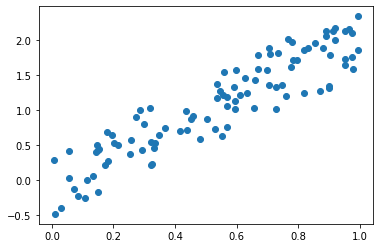

In [26]:
n = 100
x = np.random.rand(n)
beta = 2
y = beta*x + np.random.rand(n) - 0.5
plt.scatter(x, y)

In [27]:
# formally, x needs to be 2d for this to work
# so we give it an extra dimension using reshape
x = x.reshape(n, 1)

beta_estimate = np.linalg.lstsq(x, y, rcond = None)[0]

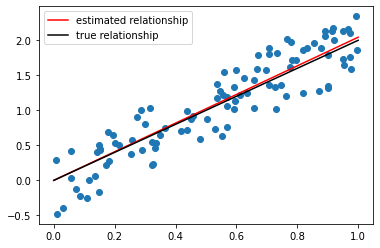

In [28]:
plt.scatter(x, y)
plt.gca().plot(np.linspace(0, 1), beta_estimate*np.linspace(0, 1), color = "red", label = "estimated relationship")
plt.gca().plot([0,1], [0,2], color = "black", label = "true relationship")
plt.legend()

This works in any number of dimensions! 

In fact, this least-squares problem has an analytic solution in terms of matrix inverses as well, given by 

$$
\hat{\beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T \mathbf{y}\;.
$$

This matrix computation is easy to implement in Python using tools from the previous section. Rather than creating a plot, let's show how we perform multidimensional regression and recover an estimate of the coefficient vector $\beta$. 

In [29]:
def least_squares(X, y):
    return np.linalg.inv(X.T @ X) @ (X.T) @ y

# multidimensional data
X = np.random.rand(100, 3)

# true value of beta is [0,1,2]
beta = np.arange(3)
y = X @ beta + np.random.rand() - 0.5

beta_hat = least_squares(X, y)
beta, beta_hat

(array([0, 1, 2]), array([0.27025418, 1.24981514, 2.19446116]))

The reason that `numpy` implements a specialized least-squares function like `lstsq` is that the analytic approach can be impractical to compute when the number of columns in `X` is large, as matrix inversion is a very slow operation. 